In [27]:
import numpy as np 
from scipy import linalg
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

pl = np.load('rts_gmlc_pl.npy')
va = np.load('rts_gmlc_va.npy')
vm = np.load('rts_gmlc_vm.npy')

concat = np.concatenate((pl,va,vm),axis=1)
lstm_concat = concat[:,0]


In [ ]:
!pip install -U tensorflow

In [31]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-seq_length):
        x = data[i:i+seq_length]
        y = data[i + seq_length : i + seq_length + seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

test_data_size = 5000
train_data = lstm_concat[:-test_data_size]
test_data = lstm_concat[-test_data_size:]


seq_length = 120
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test,axis=2)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow
model = Sequential([layers.Input((seq_length,1)),
                    layers.LSTM(64),
                    layers.Dense(seq_length,activation='relu')])


model = tensorflow.keras.models.load_model('/content/trained_lstm')

In [48]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.002),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
model.save('/content/trained_lstm',save_format="h5")

3131/3131 [==============================] - 161s 51ms/step - loss: 140.8580 - mean_absolute_error: 4.7716 - val_loss: 106.6727 - val_mean_absolute_error: 5.0905


In [38]:
train_predictions = model.predict(X_train)

3131/3131 [==============================] - 52s 17ms/step


In [39]:
result = []
for i in range(train_predictions.shape[0]):
  result.append(train_predictions[i][0])

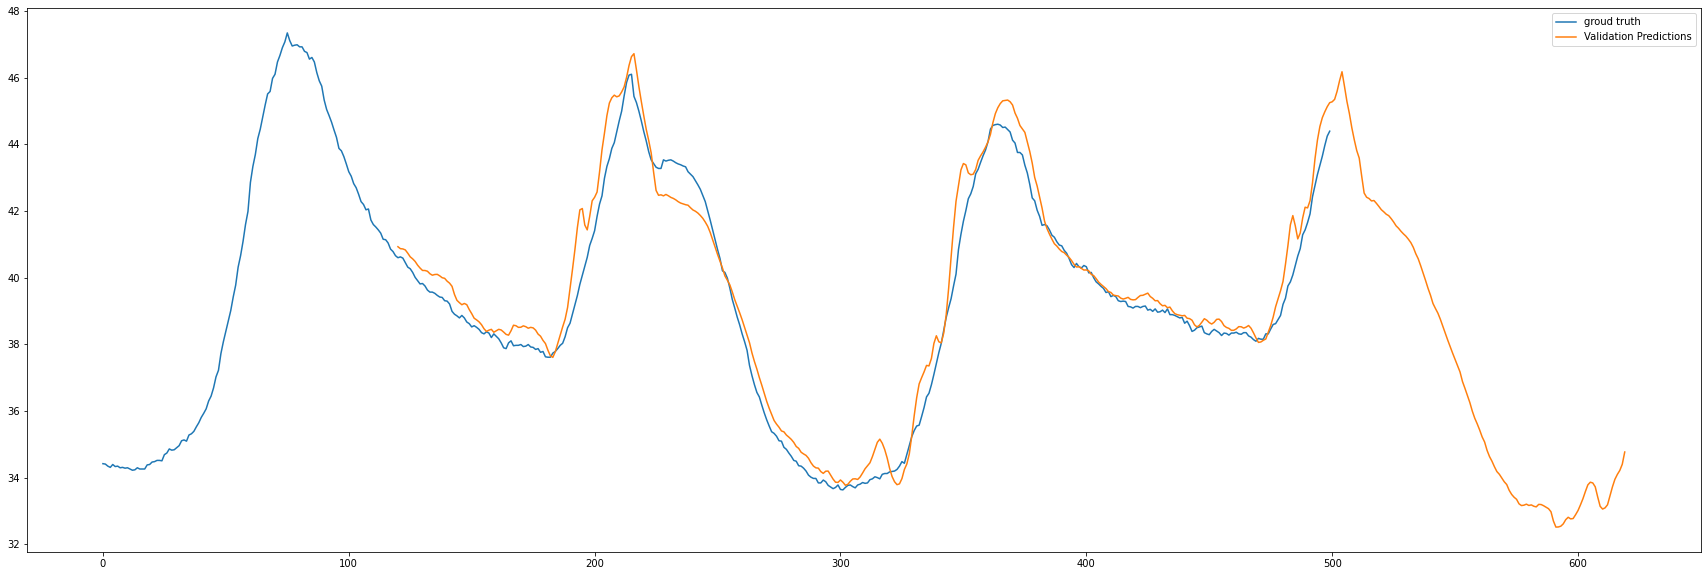

In [43]:
start = 9000
finish = 9500
size = finish - start
plt.figure(figsize=(30,10))
plt.plot(np.arange(0,size),concat[0:size,0])
plt.plot(np.arange(seq_length,size+seq_length),result[0:size])
#plt.plot(np.arange(size,size+seq_length),concat[size:size+seq_length,0])
plt.legend(['groud truth','Validation Predictions', 'prediction ground truth'])